L = 11, N = 6
11×3 DataFrame
 Row │ X        analytical  numerical 
     │ Float64  Float64     Float64   
─────┼────────────────────────────────
   1 │     0.0     1.71828    1.71828
   2 │     0.1     1.81828    1.81828
   3 │     0.2     1.91828    1.91533
   4 │     0.3     2.01828    2.01533
   5 │     0.4     2.11828    2.11289
   6 │     0.5     2.21828    2.2129
   7 │     0.6     2.31828    2.31087
   8 │     0.7     2.41828    2.41088
   9 │     0.8     2.51828    2.50921
  10 │     0.9     2.61828    2.60922
  11 │     1.0     2.71828    2.70783
max_diff = 0.010455302561874102

L = 21, N = 11
11×3 DataFrame
 Row │ X        analytical  numerical 
     │ Float64  Float64     Float64   
─────┼────────────────────────────────
   1 │     0.0     1.71828    1.71828
   2 │     0.1     1.81828    1.81795
   3 │     0.2     1.91828    1.91764
   4 │     0.3     2.01828    2.01735
   5 │     0.4     2.11828    2.11709
   6 │     0.5     2.21828    2.21685
   7 │     0.6     2.31828   

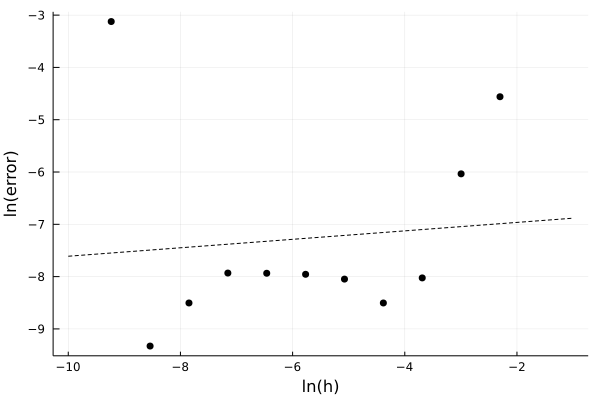


L = 10241, N = 5118
11×3 DataFrame
 Row │ X        analytical  numerical 
     │ Float64  Float64     Float64   
─────┼────────────────────────────────
   1 │     0.0     1.71828    1.71828
   2 │     0.1     1.81828    1.81827
   3 │     0.2     1.91828    1.91826
   4 │     0.3     2.01828    2.01824
   5 │     0.4     2.11828    2.11823
   6 │     0.5     2.21828    2.21816
   7 │     0.6     2.31828    2.31778
   8 │     0.7     2.41828    2.41576
   9 │     0.8     2.51828    2.50617
  10 │     0.9     2.61828    2.57425
  11 │     1.0     2.71828    2.71822
max_diff = 0.0440273734808434

fit(x) = -6.80179 + 0.0808548*x

In [53]:
using DataFrames
using CSV
using Plots
using Polynomials
using LaTeXStrings

function analytical(x, t)
    return exp(t) + x - t
end

m = 0
sigma = 2.001
touch("6sem_lab4_solution.txt")
stream = open("6sem_lab4_solution.txt", "w")

hplot = zeros(Float64, (1, 11))
dplot = zeros(Float64, (1, 11))

for iter = 1:11
    L = 10*2^m + 1
    N = Integer(round((L - 1)/sigma, digits = 0)) + 1
    t = LinRange(0, 1, N)
    x = LinRange(0, 1, L)
    diff = zeros(Float64, (1, L))
    h = 1/(L-1)
    tau = h*sigma

    u = zeros(Float64, (N, L))

    for i = 1:L
        u[1,i] = x[i] + 1
    end

    for i = 2:N
        u[i, 1] = exp(t[i]) - t[i]
        u[i, 2] = exp(t[i]) - t[i] + h
    end

    for n = 1:(N-1)
        for l = 3:L
            u[n + 1, l] = u[n, l] + tau/(2*h)*(-u[n, l-2] + 4*u[n, l-1] - 3*u[n, l]) + tau^2/(2*h^2) * (u[n, l-2] - 2*u[n, l-1] + u[n, l]) + tau * exp(t[n]) * (1+tau/2)
        end
    end


    analytical_solution = zeros(Float64, (1, L))
    for i = 1:L
        analytical_solution[i] = analytical(x[i], 1)
        diff[i] = abs(analytical(x[i], 1) - u[N, i])
    end


    xx = zeros(Float64, (1, 11))
    aa = zeros(Float64, (1, 11))
    uu = zeros(Float64, (1, 11))
    err = zeros(Float64, (1, 11))
    k = Integer((L - 1) / 10)
    write(stream, "L = "*string(L)*", N = "*string(N)*"\n")
    write(stream, "x      "*"analytical     "*"numerical            "*"err"*"\n")
    for i = 1:11
        xx[i] = x[k*(i-1) + 1]
        aa[i] = analytical_solution[k*(i-1) + 1]
        uu[i] = u[N, k*(i-1) + 1]
        err[i] = abs(uu[i] - aa[i])
        write(stream, string(xx[i])*" | "*string(round(aa[i], digits = 9))*" | "*string(round(uu[i], digits = 9))*" | "*string(err[i])*"\n")
    end
    print("L = ", L, ", N = ", N, "\n")
    df = DataFrame(X = vec(xx), analytical = vec(aa), numerical = vec(uu))
    print(df)

    print("\n","max_diff = ", maximum(err), "\n", "\n")
    write(stream, "max_diff = "*string(maximum(err))*"\n"*"\n"*"\n")
    
    m += 1
    hplot[m] = h
    dplot[m] = maximum(err)
end
#print(hplot)
#print(dplot)
xplot = LinRange(-10, -1, 1000)
scatter(vec(log.(hplot)), vec(log.(dplot)), label = "", color = "black")
f = fit(vec(log.(hplot)), vec(log.(dplot)), 1)
print("fit(x) = "*string(f))
display(plot!(xplot, f.(xplot), xlabel = "ln(h)", ylabel = "ln(error)", label = "", color = "black", linestyle = :dash))




close(stream)